In [1]:
import scipy as sp
import scipy.interpolate
import scipy.optimize
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import logging
import athplot
import numpy as np
import os
import importlib
os.chdir("/home/astrosun/jtlaune/athena/")
from mpl_styles import analytic
%matplotlib widget
import yt
yt.set_log_level("error")
importlib.reload(athplot)
logging.getLogger('matplotlib.font_manager').disabled = True

In [131]:
# takes 4 mins
file = "/home/astrosun/jtlaune/Type1BCs/type1_accrete/ppd_cyl.hst"
hst = np.loadtxt(file,usecols=(0,1,13))


In [136]:
from matplotlib.ticker import AutoMinorLocator

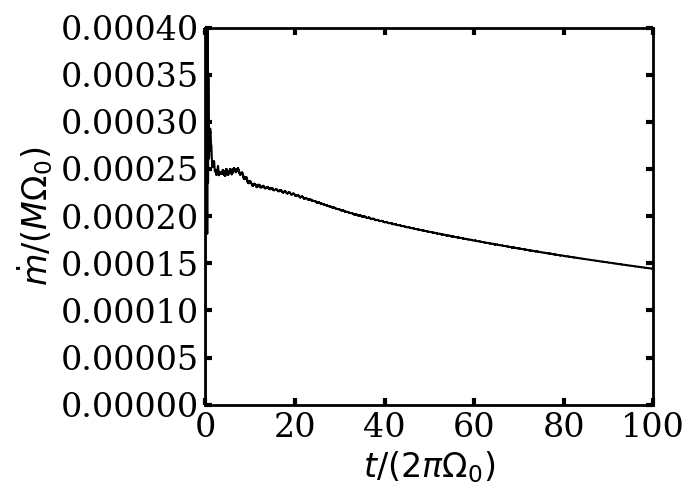

In [140]:
t = hst[:,0]/(2*np.pi)
dt = hst[:,1]/(2*np.pi)
mdot = hst[:,2]
with mpl.rc_context(analytic): fig, ax = plt.subplots(figsize=(7,5))
ax.plot(t,mdot,c="k")
ax.set_xlabel(r"$t/(2\pi\Omega_0)$")
ax.set_ylabel(r"$\dot m/(M\Omega_0)$")
ax.set_ylim((0,0.0004))
ax.set_xlim(0,100)
fig.tight_layout()


# Torques

In [151]:
# takes 8 mins
#file = "/home/astrosun/jtlaune/Type1BCs/type1_accrete/ppd_cyl.hst"
file = "/home/astrosun/jtlaune/athena/work/type2-linext/hires/accrete/ppd_cyl.hst"
hst = np.loadtxt(file,usecols=(0,1,10,12,15))

In [152]:
#takes 5 secs
#file = "/home/astrosun/jtlaune/Type1BCs/type1_fiducial/ppd_cyl.hst"
file = "/home/astrosun/jtlaune/athena/work/type2-linext/hires/no_accrete/ppd_cyl.hst"
hstFid = np.loadtxt(file,usecols=(0,1,10,12,15))

In [122]:
hstFid

array([[ 0.00000e+00,  2.16371e-04,  0.00000e+00, -5.42101e-20,
         0.00000e+00],
       [ 2.16371e-04,  2.16371e-04,  0.00000e+00,  5.56603e-13,
         0.00000e+00],
       [ 4.32743e-04,  2.16371e-04,  0.00000e+00,  1.08095e-12,
         0.00000e+00],
       ...,
       [ 6.28318e+02,  8.81964e-05,  0.00000e+00, -2.50311e-06,
         0.00000e+00],
       [ 6.28318e+02,  5.92987e-05,  0.00000e+00, -2.50311e-06,
         0.00000e+00],
       [ 6.28319e+02,  8.81978e-05,  0.00000e+00, -2.50306e-06,
         0.00000e+00]])

In [125]:
hst.shape

(52378505, 5)

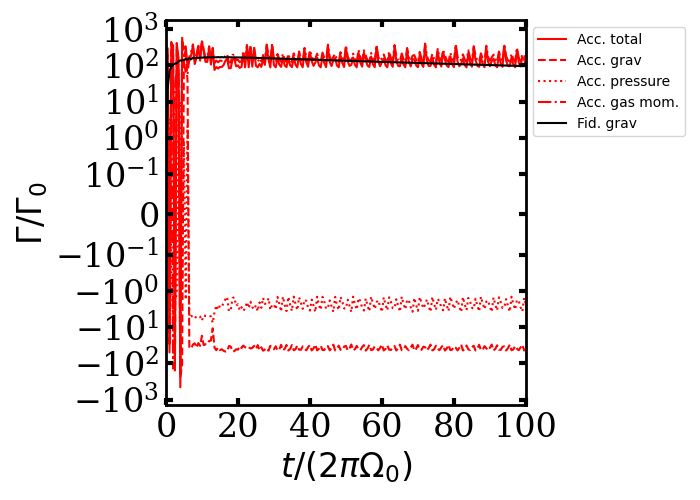

/home/astrosun/jtlaune/opt/miniconda3/envs/py311/lib/python3.11/site-packages/ipympl/backend_nbagg.py:279: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  self.manager.handle_json(content)


In [157]:
q = 1e-4
h = 0.05
G0 = q**2/h**2
t = hst[::50,0]/(2*np.pi)
tFid = hstFid[::50,0]/(2*np.pi)
dt = hst[::50,1]/(2*np.pi)
Ptorq = hst[::50,2]/G0
Gtorq = hst[::50,3]/G0
momtorq = hst[::50,4]/G0
torq = hstFid[::50,3]/G0
with mpl.rc_context(analytic): fig, ax = plt.subplots(figsize=(7,5))
ax.plot(t,Gtorq+Ptorq+momtorq,c="r",ls="-",label="Acc. total")
ax.plot(t,Gtorq,c="r",ls="--",label="Acc. grav")
ax.plot(t,Ptorq,c="r",ls=":",label="Acc. pressure")
ax.plot(t,momtorq,c="r",ls="-.",label="Acc. gas mom.")
ax.plot(tFid,torq,c="k",label="Fid. grav")
ax.set_xlabel(r"$t/(2\pi\Omega_0)$")
ax.set_ylabel(r"$\Gamma/\Gamma_0$")
#ax.set_ylim((-10,10))
ax.set_yscale("symlog",linthresh=1e-1)
ax.set_xlim(0,100)
ax.legend(bbox_to_anchor=[1.0, 1.0, 0, 0])
fig.tight_layout()


In [129]:
ax.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [ ]:

t = hst[:,0]/(2*np.pi)
dt = hst[:,1]/(2*np.pi)
mdot = hst[:,2]
with mpl.rc_context(analytic): fig, ax = plt.subplots()
ax.plot(t,mdot,c="k")
ax.set_xlabel(r"$t/(2\pi\Omega_0)$")
ax.set_ylabel(r"$\dot m/(M\Omega_0)$")
ax.set_ylim(bottom=0)
ax.set_xlim(0,100)
fig.tight_layout()

## mdot

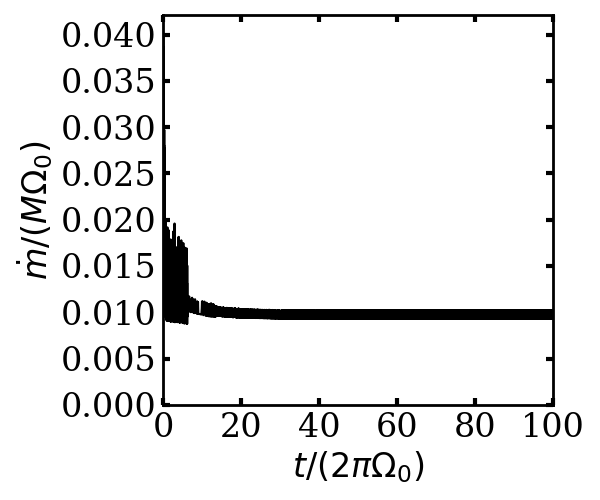

In [93]:
file = "/home/astrosun/jtlaune/athena/work/type2-linext/hires/accrete/ppd_cyl.hst"
hst = np.loadtxt(file,usecols=(0,1,13,))
t = hst[:,0]/(2*np.pi)
dt = hst[:,1]/(2*np.pi)
mdot = hst[:,2]
with mpl.rc_context(analytic): fig, ax = plt.subplots()
ax.plot(t,mdot,c="k")
ax.set_xlabel(r"$t/(2\pi\Omega_0)$")
ax.set_ylabel(r"$\dot m/(M\Omega_0)$")
ax.set_ylim(bottom=0)
ax.set_xlim(0,100)
fig.tight_layout()

# Type II

## Mesh

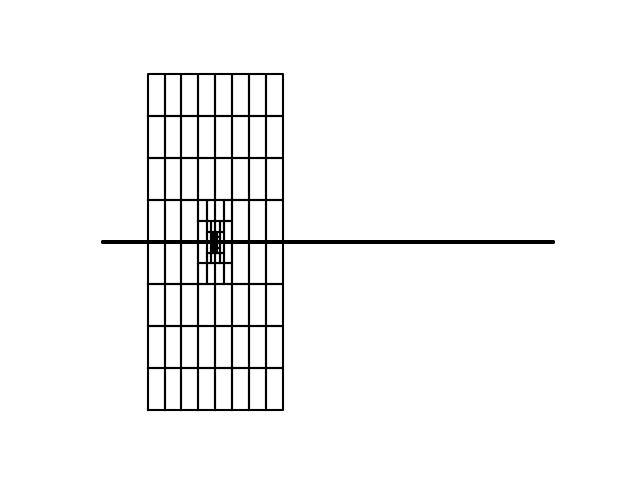

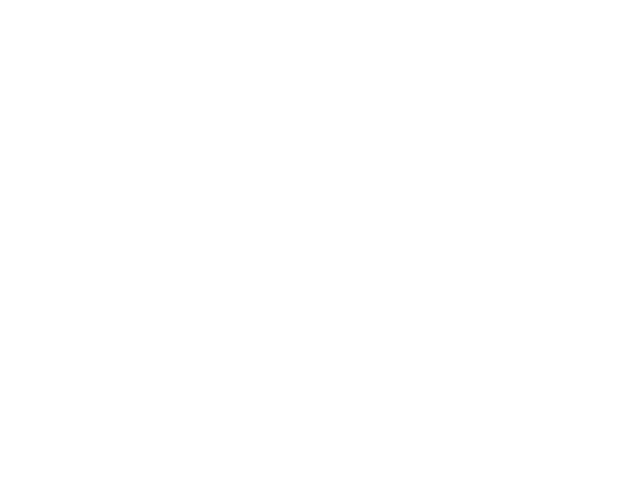

In [3]:
%run -i vis/python/plot_mesh.py -i work/smr5_noAcc/mesh_structure.dat -o show

## 2D plots

/tmp/ipykernel_271303/4623450.py:13: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im = ax.pcolormesh(


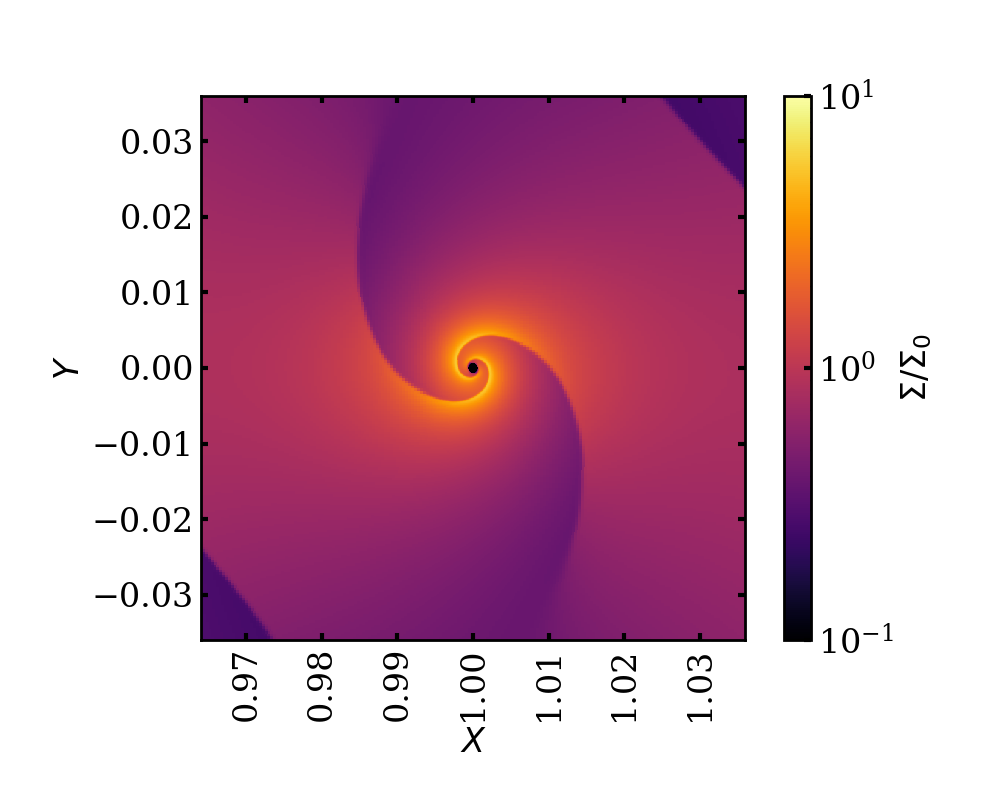

In [19]:
importlib.reload(athplot)
# ds = athplot.rawDataRestricted("/home/astrosun/jtlaune/athena/work/type2-linext/hires/no_accrete/ppd_cyl.out1.00200.athdf")
ds = athplot.rawDataRestricted(
    "/home/astrosun/jtlaune/Type1BCs/type1_accrete/ppd_cyl.out1.00100.athdf"
)
with mpl.rc_context(analytic):
    fig, ax = plt.subplots(figsize=(10, 8))
    for lev in range(7):
        cccs, lds = ds.get_level(
            lev
        )  # meaning: cell center coordinates, level data set
        meshr, meshphi = np.meshgrid(cccs[0], cccs[1])
        im = ax.pcolormesh(
            meshr * np.cos(meshphi),
            meshr * np.sin(meshphi),
            lds["dens"],
            shading="nearest",
            cmap="inferno",
            norm=colors.LogNorm(vmin=0.1, vmax=10.0),
        )
    cb = plt.colorbar(im, label=r"$\Sigma/\Sigma_0$")
    ax.set_ylabel(r"$Y$", fontsize=24)
    ax.set_xlabel(r"$X$", fontsize=24)
    ax.tick_params("x", rotation=90)
    ax.set_aspect(1)
    fig.subplots_adjust(bottom=0.2)
    ax.set_xlim((0.964,1.036))
    ax.set_ylim((-0.036,.036))
    # fig.tight_layout()

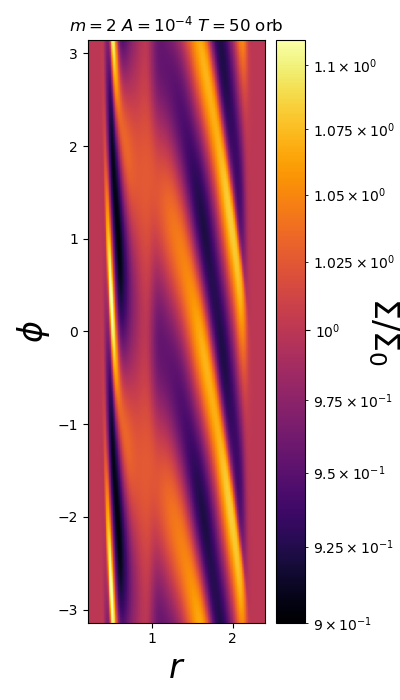

In [ ]:
importlib.reload(athplot)
ds = athplot.rawDataRestricted("/home/astrosun/jtlaune/athena/work/m-wave/testing/ppd_cyl.out1.00100.athdf")
fig, ax = plt.subplots(figsize=(4, 7))
for lev in range(1):
    cccs, lds = ds.get_level(lev) # meaning: cell center coordinates, level data set
    meshr, meshphi = np.meshgrid(cccs[0], cccs[1])
    im = ax.pcolormesh(meshr, meshphi, lds['dens'], shading='nearest', cmap="inferno", norm=colors.LogNorm(vmin=0.9, vmax=1.11))
cb = plt.colorbar(im)
cb.ax.set_ylabel(r"$\Sigma/\Sigma_0$",rotation=270,fontsize=24)
ax.set_title(r"$m=2$ $A=10^{-4}$ $T=50$ orb")
ax.set_ylabel(r"$\phi$",fontsize=24)
ax.set_xlabel(r"$r$",fontsize=24)
fig.tight_layout()
plt.auto

## Torque magnitudes over time

(<Figure size 800x500 with 1 Axes>,
 <Axes: xlabel='$T/(2\\pi\\Omega^{-1})$', ylabel='$\\Gamma/(M_pR_0^2\\Omega^2)$'>)

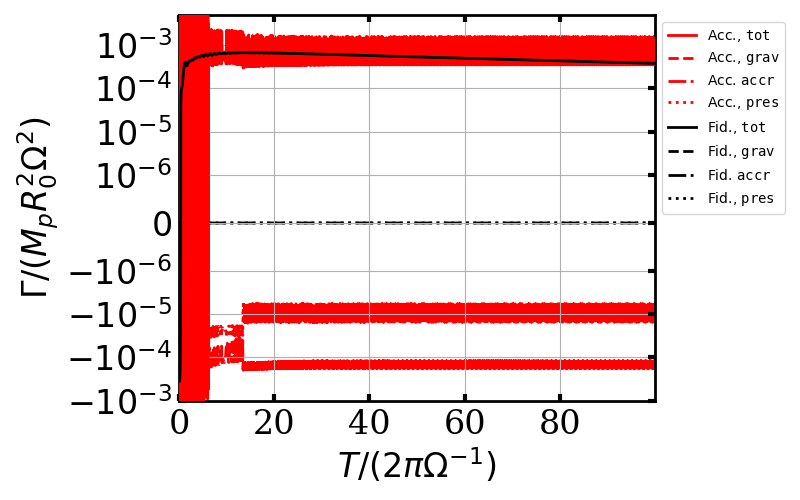

/home/astrosun/jtlaune/opt/miniconda3/envs/py311/lib/python3.11/site-packages/ipympl/backend_nbagg.py:279: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  self.manager.handle_json(content)


In [31]:
importlib.reload(athplot)
hstAcc = athplot.athhst(1e-3,"/home/astrosun/jtlaune/athena/work/type2-linext/hires/accrete/ppd_cyl.hst")
hstNoAcc = athplot.athhst(1e-3,"/home/astrosun/jtlaune/athena/work/type2-linext/hires/no_accrete/ppd_cyl.hst")

fig, ax = hstAcc.plotSmoothTorq("Acc.",1,symlog=True,linthresh=1e-6,c="r",ct="r",step=1,ybds=(-1e-3,5e-3))
hstNoAcc.plotSmoothTorq("Fid.",1,symlog=True,linthresh=1e-6,c="k",ct="k",step=1,ybds=(-1e-3,5e-3),figax=(fig,ax))

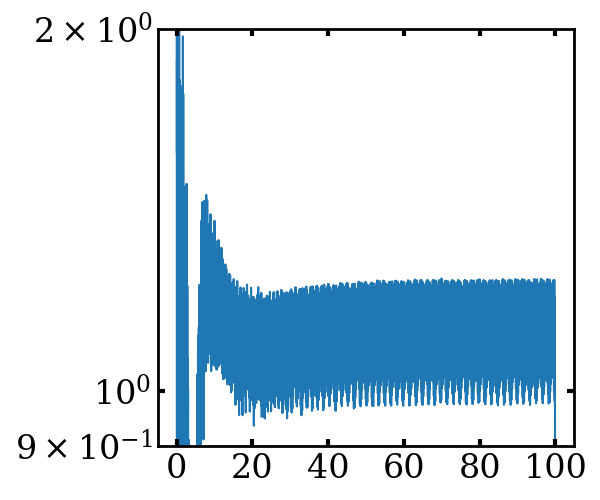

In [50]:
with mpl.rc_context(analytic): fig, ax = plt.subplots()
totAcc = hstAcc.FP_y + hstAcc.momy_accrate + hstAcc.Fsgrav_y
ax.plot(hstAcc.t, athplot.movingAverage(totAcc,24)/athplot.movingAverage(hstNoAcc.Fsgrav_y,24))
ax.set_yscale("log")
ax.set_ylim((0.9,2))
fig.tight_layout()

## Density profiles over time

In [ ]:
data_dir = "/home/astrosun/jtlaune/athena/work/smr4_noPlanet/"
with mpl.rc_context(analytic): fig, ax = plt.subplots()
for iout in [0,10,20,50,100,200]:
    data_file = os.path.join(data_dir,f"ppd_cyl.out1.{iout:05}.athdf")
    hdf5 = athplot.PpdCylAthhdf5(1e-3,(64,384),data_file)
    profs = hdf5.reduce(data_dir)
    ax.plot(profs["rMidpts"],profs["Sig"])
    ax.set_xlim((profs["rMidpts"][0],profs["rMidpts"][-1]))
ax.set_yscale("log")

In [ ]:
data_dir = "/home/astrosun/jtlaune/athena/work/smr4/"
with mpl.rc_context(analytic): fig, ax = plt.subplots()
for iout in [0,10,20,50,100,200]:
    data_file = os.path.join(data_dir,f"ppd_cyl.out1.{iout:05}.athdf")
    hdf5 = athplot.PpdCylAthhdf5(1e-3,(64,384),data_file)
    profs = hdf5.reduce(data_dir)
    ax.plot(profs["rMidpts"],profs["Sig"])
    ax.set_xlim((profs["rMidpts"][0],profs["rMidpts"][-1]))
ax.set_yscale("log")

In [ ]:
data_dir = "/home/astrosun/jtlaune/athena/work/smr4_noAcc/"
with mpl.rc_context(analytic): fig, ax = plt.subplots()
for iout in [0,10,20,50,100,200]:
    data_file = os.path.join(data_dir,f"ppd_cyl.out1.{iout:05}.athdf")
    hdf5 = athplot.PpdCylAthhdf5(1e-3,(64,384),data_file)
    profs = hdf5.reduce(data_dir)
    ax.plot(profs["rMidpts"],profs["Sig"])
    ax.set_xlim((profs["rMidpts"][0],profs["rMidpts"][-1]))
ax.set_yscale("log")

## Density profiles

In [ ]:
mRing = {}
SigProf = {}
vrMassAvg = {}
Mdot = {}
vrdmRing = {}
SigdmRing = {}

In [6]:
for iout in np.arange(1,10)*100: #[0,1000,1100,1200,1300,1400,1500,1600]:
    #file = f"/home/astrosun/jtlaune/athena/work/type2-linext/hires/no_accrete/ppd_cyl.out1.{iout:05}.athdf"
    file = f"/home/astrosun/jtlaune/Type1BCs/type1_fiducial_400/ppd_cyl.out1.{iout:05}.athdf"
    ds = yt.load(file)
    dd = ds.all_data()
    dens_data = np.array(dd["athena_pp", "dens"])
    vr_data = np.array(dd["athena_pp", "mom1"]) / dens_data
    vphi_data = np.array(dd["athena_pp", "mom2"]) / dens_data
    # coords are cell-centered
    coords = np.array(dd.fcoords)
    # widths of cells
    fwidths = np.array(dd.fwidth)
    Nr = 256
    #Nr = 192


    ristart = 0
    riend = Nr + 1
    rEdges = np.linspace(0.4, 1.6, riend, endpoint=True)
    rMids = (rEdges[:-1] + rEdges[1:]) / 2

    mRing[iout] = np.zeros(Nr)
    vrdmRing[iout] = np.zeros(Nr)
    SigdmRing[iout] = np.zeros(Nr)

    for i in range(len(dens_data)):
        Sig = dens_data[i]
        vr = vr_data[i]
        vphi = vphi_data[i]
        r = coords[i, 0]
        phi = coords[i, 1]
        for j in range(Nr+1):
            if rEdges[j] < r <= rEdges[j + 1]:
                rsecn = np.sqrt(r**2 + 1 - 2 * r * np.cos(phi))
                x = r * np.cos(phi)
                y = r * np.sin(phi)

                dr = fwidths[i, 0]
                dphi = fwidths[i, 1]
                dA = r * dr * dphi
                dm = Sig*dA

                mRing[iout][j] += dm
                vrdmRing[iout][j] += vr*dm
                SigdmRing[iout][j] += Sig*dm

    SigProf[iout] = mRing[iout] / (2 * np.pi * rMids[:] * np.diff(rEdges)[:])
    vrMassAvg[iout] = vrdmRing[iout] / mRing[iout]
    Mdot[iout] = 2*np.pi*rMids*vrMassAvg[iout]*SigProf[iout]


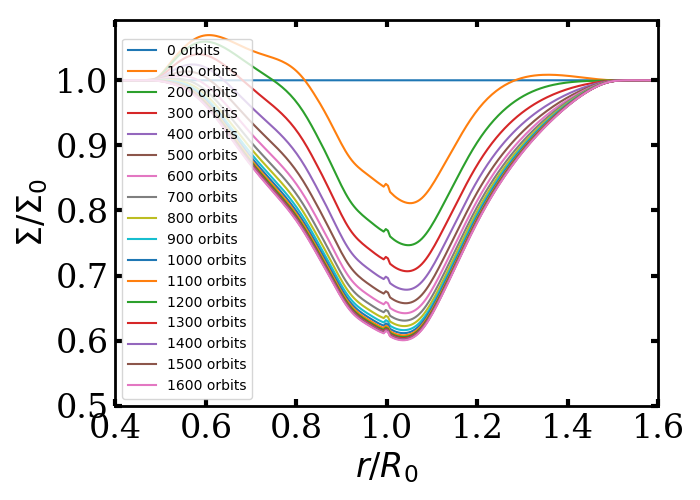

In [7]:
with mpl.rc_context(analytic): fig, ax = plt.subplots(figsize=(7,5))
#for iout in [0,10,20,50,100,200]:
#for iout in [0,10,20,50,80,90,100]:
for iout in np.arange(17)*100:
    ax.plot(rMids,SigProf[iout],label=f"{iout} orbits")    
ax.set_ylabel(r"$\Sigma/\Sigma_0$")
ax.set_xlabel(r"$r/R_0$")
ax.legend()
ax.set_ylim(bottom=0.5)
ax.set_xlim((0.4,1.6))
fig.tight_layout()

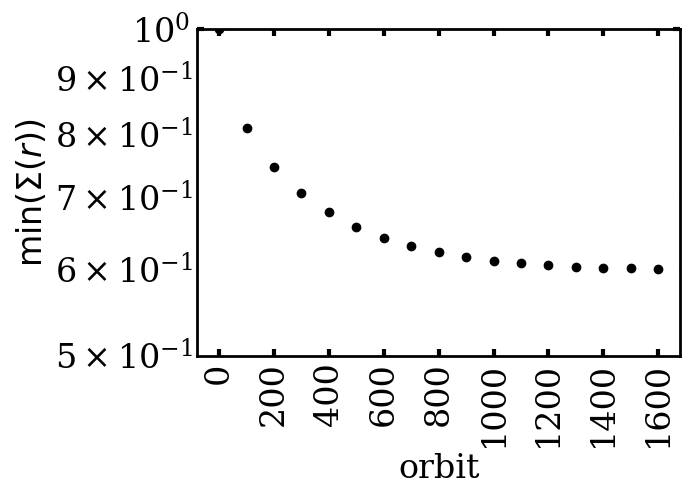

In [14]:
with mpl.rc_context(analytic): fig, ax = plt.subplots(figsize=(7,5))
for iout in np.arange(17)*100:
    ax.scatter(iout,np.min(SigProf[iout]),c="k")
ax.set_yscale("log")
ax.set_ylim(0.5,1)
ax.tick_params("x", rotation=90)
ax.set_xlabel(r"orbit")
ax.set_ylabel(r"$\min(\Sigma(r))$")
fig.tight_layout()

## $\dot M$ profiles

In [147]:
#file = "/home/astrosun/jtlaune/Type1BCs/type1_accrete/ppd_cyl.out1.00100.athdf"
file = "/home/astrosun/jtlaune/Type1BCs/type1_fiducial/ppd_cyl.out1.00100.athdf"
#file = "/home/astrosun/jtlaune/Type1BCs/type1_accrete/ppd_cyl.out1.00000.athdf"
#file = "/home/astrosun/jtlaune/athena/work/type2-linext/hires/accrete/ppd_cyl.out1.00200.athdf"
#file = "/home/astrosun/jtlaune/athena/work/type2-linext/hires/no_accrete/ppd_cyl.out1.00200.athdf"
#file = "/home/astrosun/jtlaune/athena/work/type2-linext/hires/no_accrete/ppd_cyl.out1.00000.athdf"
ds = yt.load(file)
dd = ds.all_data()
dens_data = np.array(dd["athena_pp", "dens"])
vr_data = np.array(dd["athena_pp", "mom1"]) / dens_data
vphi_data = np.array(dd["athena_pp", "mom2"]) / dens_data
# coords are cell-centered
coords = np.array(dd.fcoords)
# widths of cells
fwidths = np.array(dd.fwidth)
Nr = 192

ristart = 0
riend = Nr + 1
rEdges = np.linspace(0.4, 1.6, riend, endpoint=True)
rMids = (rEdges[:-1] + rEdges[1:]) / 2

mRing = np.zeros(Nr)
vrdmRing = np.zeros(Nr)
SigdmRing = np.zeros(Nr)

for i in range(len(dens_data)):
    Sig = dens_data[i]
    vr = vr_data[i]
    vphi = vphi_data[i]
    r = coords[i, 0]
    phi = coords[i, 1]
    for j in range(Nr+1):
        if rEdges[j] < r <= rEdges[j + 1]:
            rsecn = np.sqrt(r**2 + 1 - 2 * r * np.cos(phi))
            x = r * np.cos(phi)
            y = r * np.sin(phi)

            dr = fwidths[i, 0]
            dphi = fwidths[i, 1]
            dA = r * dr * dphi
            dm = Sig*dA

            mRing[j] += dm
            vrdmRing[j] += vr*dm
            SigdmRing[j] += Sig*dm

SigProf = mRing / (2 * np.pi * rMids[:] * np.diff(rEdges)[:])
vrMassAvg = vrdmRing / mRing
Mdot = 2*np.pi*rMids*vrMassAvg*SigProf

In [148]:
#with mpl.rc_context(analytic): fig,ax = plt.subplots(figsize=(7,5))
ax.plot(rMids,Mdot,label=r"Fid.",c="k")
#ax.plot(rMids,Mdot,label=r"Acc.",c="r")
#ax.plot(rMids,Mdot,label=r"I.C.",c="k",ls=":")
ax.set_xlabel(r"$r/R_0$",fontsize=24)
ax.set_ylabel(r"$\dot M(r)/(M\Omega_0)$",fontsize=24)
ax.legend()
ax.set_xlim((0.4,1.6))
#ax.set_ylim((-0.03,0))
fig.tight_layout()


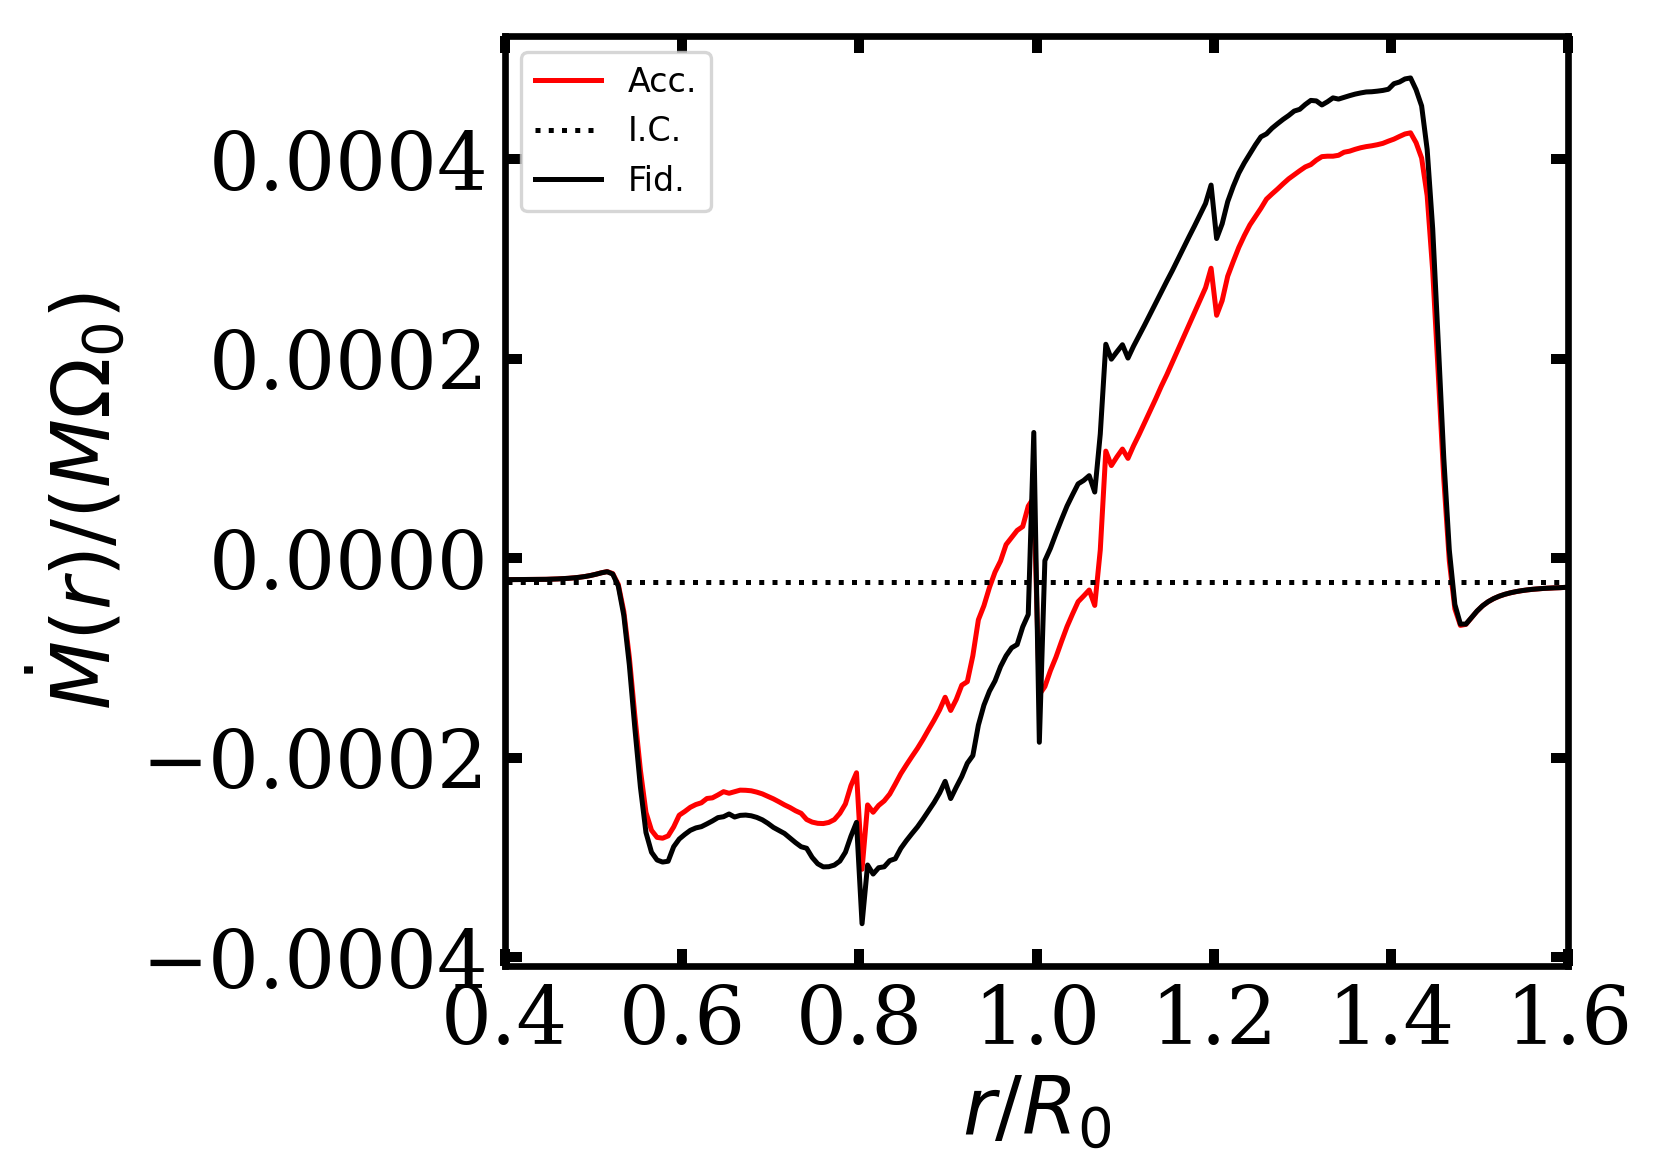

In [149]:
fig

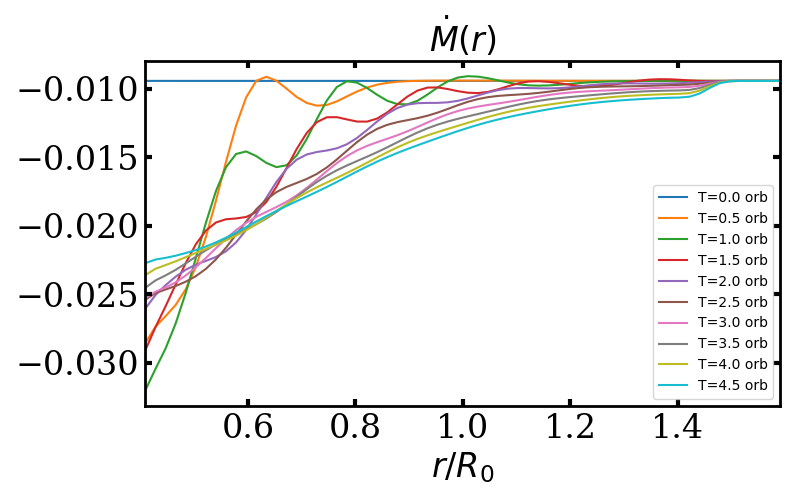

In [51]:
importlib.reload(athplot)
data_dir = "/home/astrosun/jtlaune/athena/work/type2-linext/no_planet/"
with mpl.rc_context(analytic): fig, ax = plt.subplots(figsize=(8,5))
for iout in range(0,10):
    data_file = os.path.join(data_dir,f"ppd_cyl.out1.{iout:05}.athdf")
    hdf5 = athplot.PpdCylAthhdf5(1e-3,(64,384),data_file,data_dir,force=False)
    profs = hdf5.load()
    ax.plot(profs["rMidpts"],profs["Mdot"],label=f"T={iout*0.5} orb")
    ax.set_xlim((profs["rMidpts"][0],profs["rMidpts"][-1]))
#ax.set_yscale("log")
ax.legend()
ax.set_title(r"$\dot M(r)$",fontsize=24)
ax.set_xlabel(r"$r/R_0$")
fig.tight_layout()

In [13]:
0.001/3/np.pi

0.0001061032953945969

## $\dot M$ profiles from interpolation

In [71]:
def interp(iout):
    data_dir = "/home/astrosun/jtlaune/athena/work/type2-linext/accrete/"
    ds = yt.load(os.path.join(data_dir, f"ppd_cyl.out1.{iout:05}.athdf"))
    dd = ds.all_data()
    r = np.linspace(0.4, 1.6, 2048 + 1)
    p = np.linspace(-np.pi, np.pi, 12288 + 1)
    r = (r[:-1] + r[1:]) / 2
    p = (p[:-1]+p[1:])/2
    RR, PP = np.meshgrid(r, p)
    densInterp = sp.interpolate.griddata(
        (np.array(dd.fcoords[:, 0]), np.array(dd.fcoords[:, 1])),
        np.array(dd["athena_pp", "dens"]),
        (RR.flatten(), PP.flatten()),
        method="nearest",
    )
    vrInterp = sp.interpolate.griddata(
        (np.array(dd.fcoords[:, 0]), np.array(dd.fcoords[:, 1])),
        np.array(dd["athena_pp", "mom1"]) / np.array(dd["athena_pp", "dens"]),
        (RR.flatten(), PP.flatten()),
        method="nearest",
    )
    return (RR, PP, densInterp.reshape(RR.shape), vrInterp.reshape(RR.shape))

In [5]:
print(192*2**6)
print(1152*2**6)

12288
73728


In [72]:
RR1, PP1, densInterp1, vrInterp1 = interp(0)
RR2, PP2, densInterp2, vrInterp2 = interp(200)

In [41]:
print(RR1[0,:].shape)

(1024,)


In [4]:
print(vrInterp2)

[[-0.00366348 -0.00366348 -0.00366348 ... -0.00094301 -0.00094301
  -0.00094301]
 [-0.00366348 -0.00366348 -0.00366348 ... -0.00094301 -0.00094301
  -0.00094301]
 [-0.00366348 -0.00366348 -0.00366348 ... -0.00094301 -0.00094301
  -0.00094301]
 ...
 [-0.00366348 -0.00366348 -0.00366348 ... -0.00094301 -0.00094301
  -0.00094301]
 [-0.00366348 -0.00366348 -0.00366348 ... -0.00094301 -0.00094301
  -0.00094301]
 [-0.00366348 -0.00366348 -0.00366348 ... -0.00094301 -0.00094301
  -0.00094301]]


In [73]:
#with mpl.rc_context(analytic): fig,ax = plt.subplots(figsize=(7,5))
#ax.plot(RR1[0,:],2*np.pi*np.mean(RR1*vrInterp1*densInterp1,axis=0),label=r"I.C.",c="k",ls=":")
#ax.plot(RR2[0,:],2*np.pi*np.mean(RR2*vrInterp2*densInterp2,axis=0),label=r"Fid.",c="k")
ax.plot(RR2[0,:],2*np.pi*np.mean(RR2*vrInterp2*densInterp2,axis=0),label=r"Acc.",c="r")
ax.set_xlabel(r"$r/R_0$",fontsize=24)
ax.set_ylabel(r"$\dot M(r)$",fontsize=24)
ax.legend()
ax.set_ylim((-0.03,0))
fig.tight_layout()

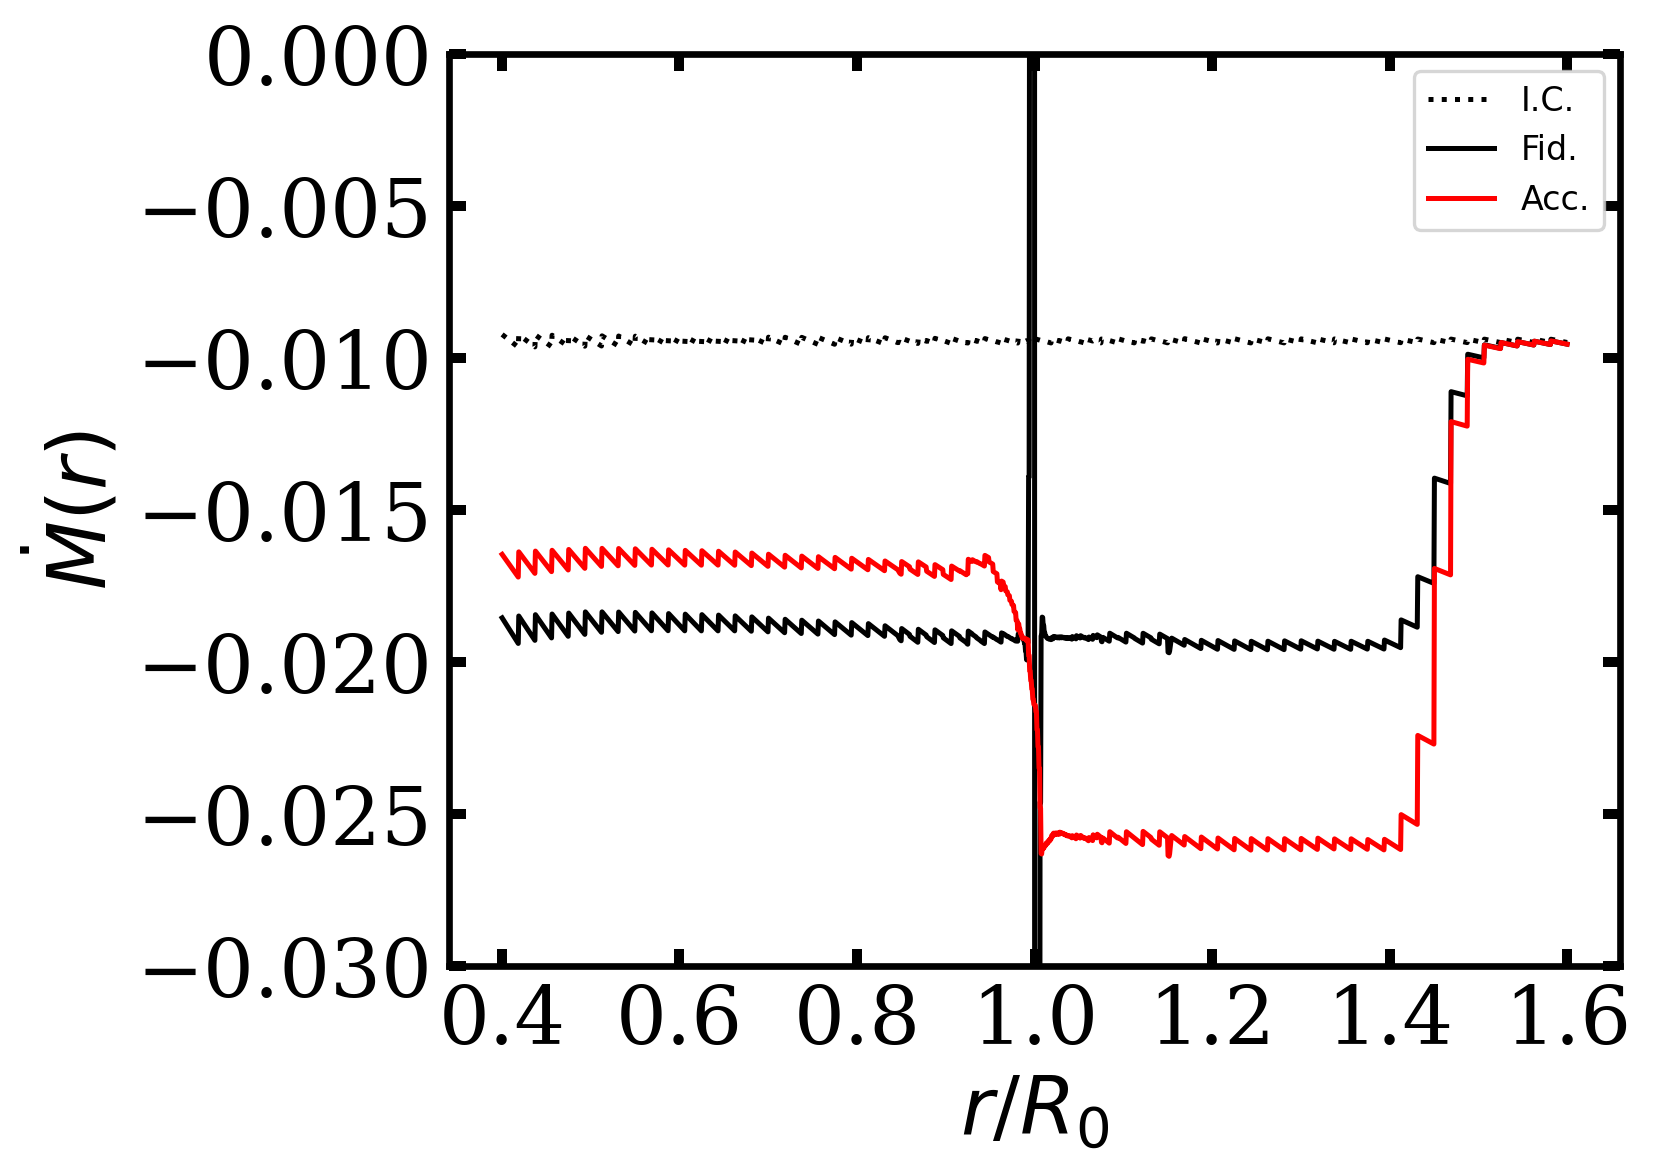

In [74]:
fig

In [44]:
fig.tight_layout()

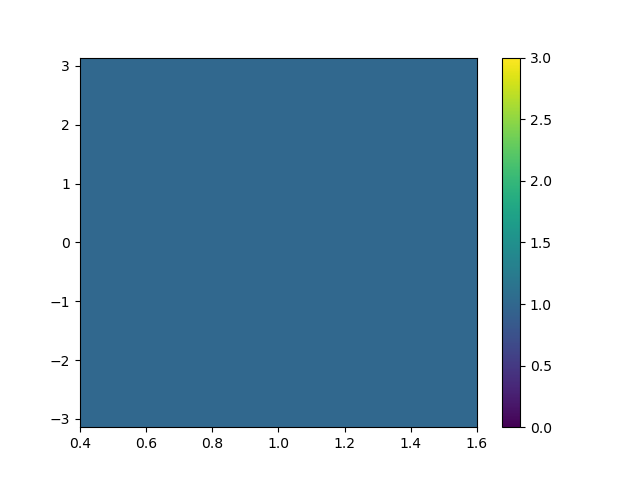

In [10]:
fig, ax = plt.subplots()
cs = ax.pcolormesh(RR2,PP2,densInterp2,vmin=0,vmax=3)
plt.colorbar(cs)

In [33]:
densInterp = densInterp.reshape(RR.shape)
vrInterp = vrInterp.reshape(RR.shape)

In [34]:
#fig,ax = plt.subplots()
ax.plot(r,2*np.pi*np.mean(RR*vrInterp*densInterp,axis=1))

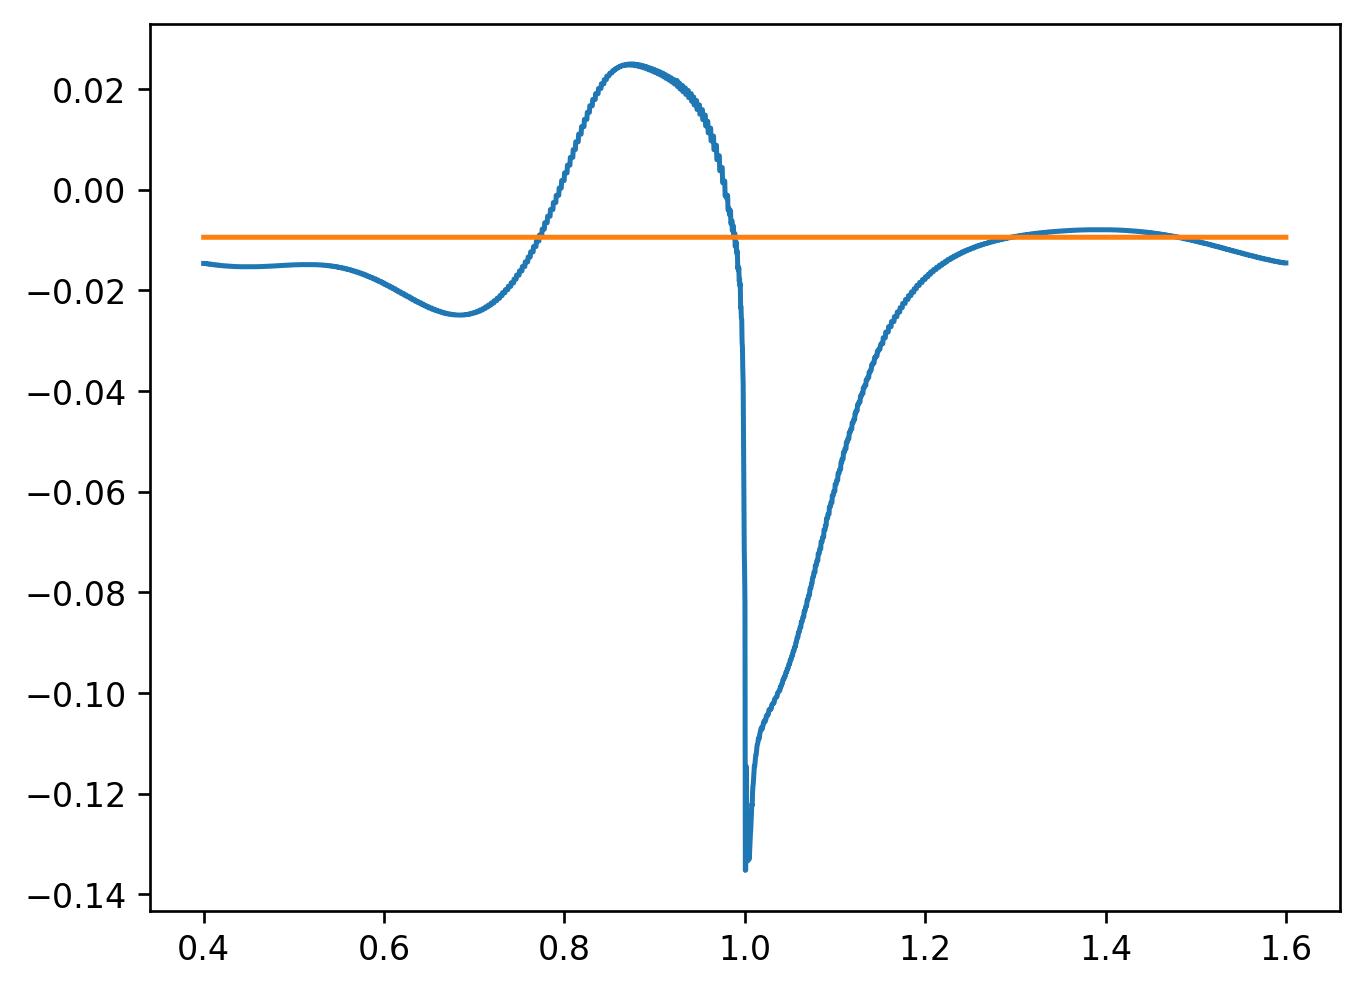

In [35]:
fig

In [ ]:

        dens_data = np.array(dd["athena_pp", "dens"])
        vr_data = np.array(dd["athena_pp", "mom1"]) / dens_data
        vphi_data = np.array(dd["athena_pp", "mom2"]) / dens_data
        # coords are cell-centered
        coords = np.array(dd.fcoords)
        # widths of cells
        fwidths = np.array(dd.fwidth)

## Type I

## Meeting with Rixin 7/7/23

1. use q=5e-5
2. use duffel gap profile initial, extend radial domain
3. increase nu to 1e-5
4. change shape of meshblock to be more square, 2^n
5. resolve 2% hill with ~6 cells (only 5 levels of refinement)

**6. non-accreting first without gap profile**  
**Send Rixin better torque plots of the already-ran Type1**

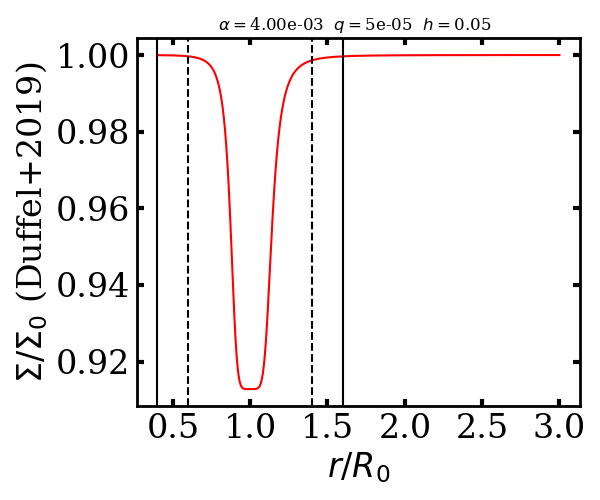

In [39]:
# duffel gap profile
h_r = 0.05
nu =1e-5
q = 5e-5

a = 1
vk = 1

M = 1/h_r
alpha = nu/(h_r*vk)**2
D = 7*M**1.5/alpha**0.25

def qtil(x):
    return q/(1+D**3*((x/a)**(1./6)-1)**6)**(1./3)

def de(q):
    qc = np.zeros(len(q))
    q_NL = 1.04*M**(-3)
    q_w = q_NL*(alpha*M)**(1./5)
    for i in range(len(qc)):
        if q[i] < q_NL:
            qc[i] = 1
        else:
            qc[i] = (q/q_NL)**(-1./2)+(q/q_w)**3
    return(qc)

def Sig_Sig0(x):
    return 1/(1+(0.45*qtil(x)**2*M**5*de(qtil(x)))/(3*np.pi*alpha))

r = np.linspace(0.4, 3.0, 1000)
with mpl.rc_context(analytic):
    fig, ax = plt.subplots()
ax.plot(r, Sig_Sig0(r), c="r")
ax.set_ylabel(r"$\Sigma/\Sigma_0$ (Duffel+2019)")
ax.set_xlabel(r"$r/R_0$")
ax.axvline(x=0.4, ls="-", c="k")
ax.axvline(x=0.6, ls="--", c="k")
ax.axvline(x=1.6, ls="-", c="k")
ax.axvline(x=1.4, ls="--", c="k")
ax.set_title(
    r"$\alpha=$" + f"{alpha:0.2e}  " + r"$q=$" + f"{q}  " + r"$h=$" + f"{h_r}  "
)
fig.tight_layout()

Some parameter estimations

In [16]:
K = 5e-5**2/0.004/0.05**5
1/(1+0.04*K)

0.9259259259259258

In [155]:
2**(-1./3)*14/2 # drop level of evolution
# 400 orbits

5.555903681888698

In [157]:
1e-5/(0.05**2)

0.003999999999999999

In [43]:
(5e-5/3)**(1./3)*.02

0.0005108729549290355

## 2D Density

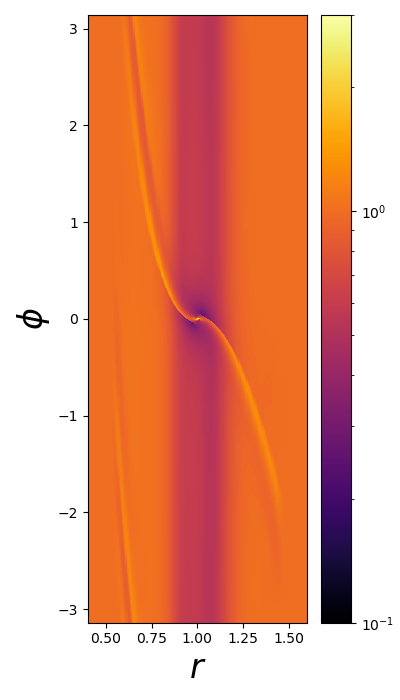

In [133]:
importlib.reload(athplot)
ds = athplot.rawDataRestricted("/home/astrosun/jtlaune/Type1BCs/type1_accrete/ppd_cyl.out1.00100.athdf")
fig, ax = plt.subplots(figsize=(4, 7))
for lev in range(7):
    cccs, lds = ds.get_level(lev) # meaning: cell center coordinates, level data set
    meshr, meshphi = np.meshgrid(cccs[0], cccs[1])
    im = ax.pcolormesh(meshr, meshphi, lds['dens'], shading='nearest', cmap="inferno", norm=colors.LogNorm(vmin=0.1, vmax=3))
cb = plt.colorbar(im)
ax.set_ylabel(r"$\phi$",fontsize=24)
ax.set_xlabel(r"$r$",fontsize=24)
fig.tight_layout()


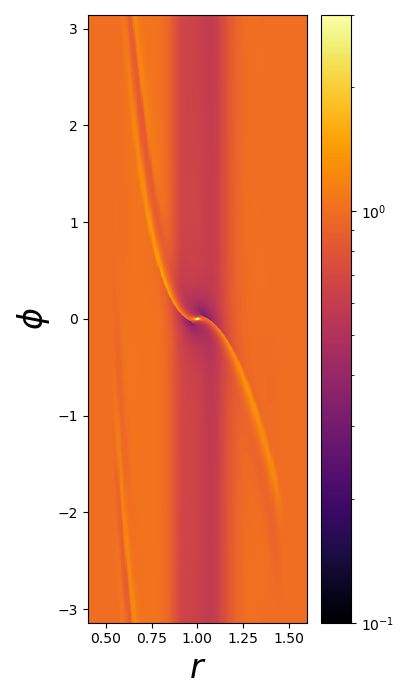

In [41]:
importlib.reload(athplot)
ds = athplot.rawDataRestricted("/home/astrosun/jtlaune/Type1BCs/type1_fiducial/ppd_cyl.out1.00100.athdf")
fig, ax = plt.subplots(figsize=(4, 7))
for lev in range(7):
    cccs, lds = ds.get_level(lev) # meaning: cell center coordinates, level data set
    meshr, meshphi = np.meshgrid(cccs[0], cccs[1])
    im = ax.pcolormesh(meshr, meshphi, lds['dens'], shading='nearest', cmap="inferno", norm=colors.LogNorm(vmin=0.1, vmax=3))
cb = plt.colorbar(im)
ax.set_ylabel(r"$\phi$",fontsize=24)
ax.set_xlabel(r"$r$",fontsize=24)
fig.tight_layout()



## Density profiles

### Accreting

In [71]:
data_dir = "/home/astrosun/jtlaune/Type1BCs/type1_accrete"
outdir = "/home/astrosun/jtlaune/Type1Outs/accrete"
for iout in [0,10,20,50,90,100]:
    data_file = os.path.join(data_dir,f"ppd_cyl.out1.{iout:05}.athdf")
    hdf5 = athplot.PpdCylAthhdf5(1e-3,(192,1152),data_file,outdir)
    profs = hdf5.load()

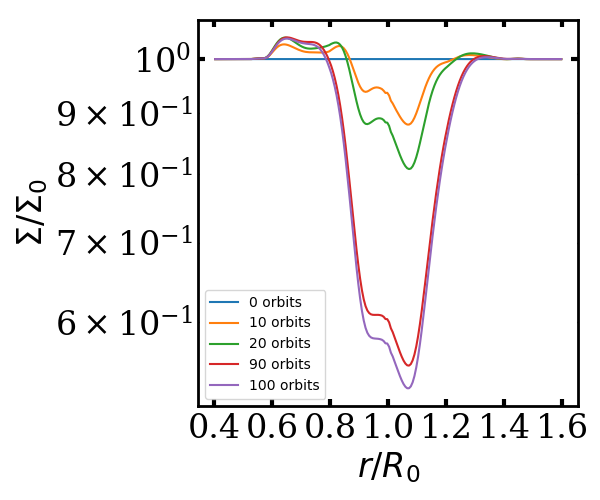

In [69]:
data_dir = "/home/astrosun/jtlaune/Type1BCs/type1_accrete"
outdir = "/home/astrosun/jtlaune/Type1Outs/accrete"
with mpl.rc_context(analytic): fig, ax = plt.subplots()
for iout in [0,10,20,90,100]:
    data_file = os.path.join(data_dir,f"ppd_cyl.out1.{iout:05}.athdf")
    hdf5 = athplot.PpdCylAthhdf5(1e-3,(192,1152),data_file,outdir)
    profs = hdf5.load()
    ax.plot(profs["rMidpts"],profs["Sig"],label=f"{iout} orbits")
ax.set_yscale("log")
ax.legend()
ax.set_xlabel(r"$r/R_0$")
ax.set_ylabel(r"$\Sigma/\Sigma_0$")
fig.tight_layout()

### Fiducial

In [15]:
mins = np.zeros(81)
for i,iout in enumerate(np.arange(81)*10):
    data_file = os.path.join(data_dir,f"ppd_cyl.out1.{iout:05}.athdf")
    hdf5 = athplot.PpdCylAthhdf5(1e-3,(256,1536),data_file,outdir)
    profs = hdf5.load()
    mins[i] = np.min(profs["Sig"])

In [121]:
def fitFunc(t, A, tau, b):
    return A * np.exp(t/tau) + b


popt, pcov = sp.optimize.curve_fit(
    fitFunc, np.arange(20, 81) * 10, mins[20:], [1, -100, 1]
)
print(popt)

[ 2.72198132e-01 -3.20243433e+02  6.00257573e-01]


In [138]:
1400/320

4.375

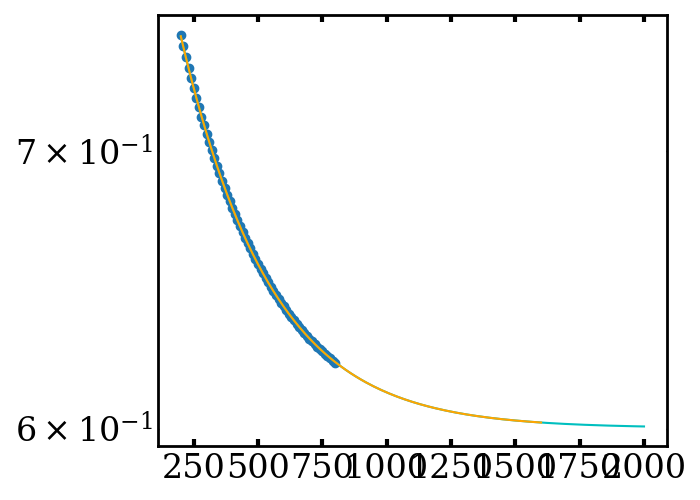

In [137]:
with mpl.rc_context(analytic): fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(np.arange(20,81)*10,mins[20:])
ax.plot(np.arange(20,201)*10, fitFunc(np.arange(20,201)*10,popt[0],popt[1],popt[2]),c="c")
ax.plot(np.arange(20,161)*10, fitFunc(np.arange(20,161)*10,popt[0],popt[1],popt[2]),c="orange")
ax.set_yscale("log")
fig.tight_layout()

In [10]:
data_dir = "/home/astrosun/jtlaune/Type1BCs/type1_fiducial_400"
outdir = "/home/astrosun/jtlaune/Type1Outs/no_accrete"
for iout in [0,100,400,700,750,760,770,780,790,800]:
    data_file = os.path.join(data_dir,f"ppd_cyl.out1.{iout:05}.athdf")
    hdf5 = athplot.PpdCylAthhdf5(1e-3,(256,1536),data_file,outdir)
    profs = hdf5.load()

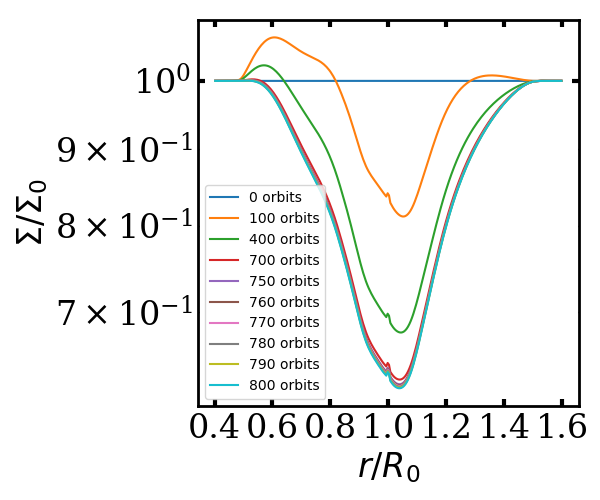

In [12]:
with mpl.rc_context(analytic): fig, ax = plt.subplots()
for iout in [0,100,400,700,750,760,770,780,790,800]:
    data_file = os.path.join(data_dir,f"ppd_cyl.out1.{iout:05}.athdf")
    hdf5 = athplot.PpdCylAthhdf5(1e-3,(256,1536),data_file,outdir)
    profs = hdf5.load()
    ax.plot(profs["rMidpts"],profs["Sig"],label=f"{iout} orbits")
ax.set_yscale("log")
ax.legend()
ax.set_xlabel(r"$r/R_0$")
ax.set_ylabel(r"$\Sigma/\Sigma_0$")
fig.tight_layout()

## Reducing the history file

In [148]:
data = np.loadtxt("/home/astrosun/jtlaune/Type1BCs/type1_fiducial_400/ppd_cyl.hst")
data.shape
data_reduced = {}
for i in range(16):
    data_reduced[i] = athplot.movingAverage(data[:,i],1)[::1000]

np.save("/home/astrosun/jtlaune/Type1Outs/no_accrete/reducedHst.npy",data_reduced)

In [9]:
hstNoAcc = np.load("/home/astrosun/jtlaune/Type1Outs/no_accrete/reducedHst.npz.npy",allow_pickle=True).item()
hstAcc = np.load("/home/astrosun/jtlaune/Type1Outs/accrete/reducedHst.npz.npy",allow_pickle=True).item()

In [11]:
hstAcc[0][-1]/(2*np.pi)

99.99884611298486

In [7]:
print(5e-5**2/0.05**2)
print(hstNoAcc[12][-1])

9.999999999999997e-07
4.065799998898001e-06


## Torque

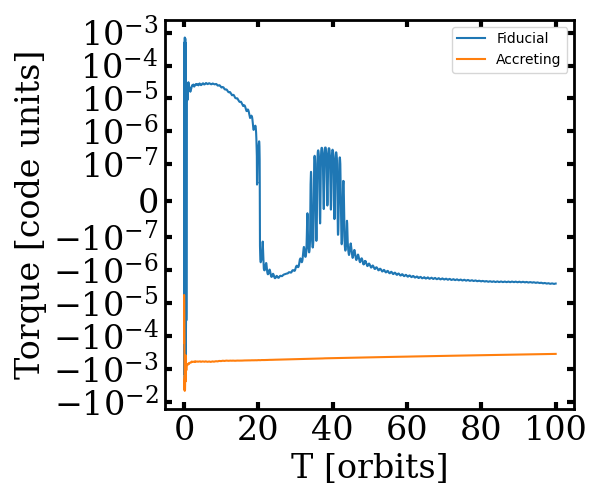

/home/astrosun/jtlaune/opt/miniconda3/envs/py311/lib/python3.11/site-packages/ipympl/backend_nbagg.py:279: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  self.manager.handle_json(content)


In [12]:
with mpl.rc_context(analytic): fig, ax = plt.subplots()
ax.plot(hstNoAcc[0]/(2*np.pi),hstNoAcc[12],label="Fiducial")
ax.plot(hstAcc[0]/(2*np.pi),hstAcc[12]+hstAcc[10]+hstAcc[15],label="Accreting")
ax.set_yscale("symlog",linthresh=1e-7)
ax.legend()
ax.set_ylabel("Torque [code units]")
ax.set_xlabel("T [orbits]")
fig.tight_layout()

## Disk Mass

In [ ]:
with mpl.rc_context(analytic): fig, ax = plt.subplots()
ax.plot(hstNoAcc[0]/(2*np.pi),hstNoAcc[12],label="Fiducial")
ax.plot(hstAcc[0]/(2*np.pi),hstAcc[12]+hstAcc[10]+hstAcc[15],label="Accreting")
ax.set_yscale("symlog",linthresh=1e-7)
ax.legend()
ax.set_ylabel("Torque [code units]")
ax.set_xlabel("T [orbits]")
fig.tight_layout()
